In [1]:
# Libraries
import yaml
import json
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import shutil
import os
import random
# from sklearn.model_selection import train_test_split
import cv2
import glob
from concurrent.futures import ProcessPoolExecutor
from PIL import Image
import matplotlib.image as mpimg
from concurrent.futures import ThreadPoolExecutor


In [2]:
# Connect to google drive
from google.colab import drive
drive.mount(r'/content/drive',force_remount = True)
%cd /content/drive/MyDrive/YOLO_fine_tuning

Mounted at /content/drive
/content/drive/MyDrive/YOLO_fine_tuning


# Yolov8 model initialization

In [ ]:
# Load yolo
!pip install ultralytics
from ultralytics import YOLO

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 663.2/663.2 kB 4.0 MB/s eta 0:00:00


In [ ]:
# Intitialize a standard YOLO model
yolo_model = YOLO('yolov8n.pt')

# Hyperparameters Fine-Tuning

In [ ]:
yolo_model.tune(data = "ocr_data.yaml", epochs = 10, iterations = 10)

Tuner: Initialized Tuner instance with 'tune_dir=runs/detect/tune'
Tuner: 💡 Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/10 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}
Saved runs/detect/tune/tune_scatter_plots.png
Saved runs/detect/tune/tune_fitness.png

Tuner: 1/10 iterations complete ✅ (1493.41s)
Tuner: Results saved to runs/detect/tune
Tuner: Best fitness=0.66201 observed at iteration 1
Tuner: Best fitness metrics are {'metrics/precision(B)': 0.73545, 'metrics/recall(B)': 0.70914, 'metrics/mAP50(B)': 0.76324, 'metrics/mAP50-95(B)': 0.65076, 'val/box_loss': 0.58953, 'val/cls_loss': 0.82336, 'va

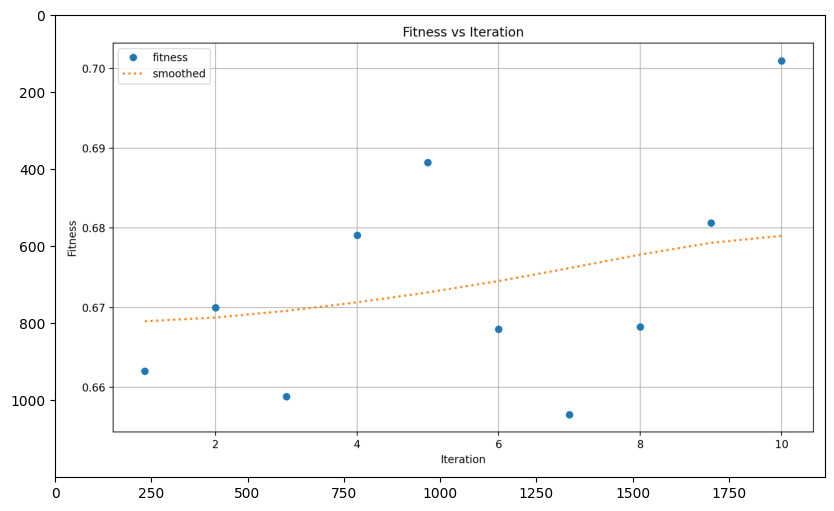

In [3]:
# Show results
fig = plt.figure(figsize=(10, 6))
plt.imshow(Image.open("/content/drive/MyDrive/YOLO_fine_tuning/runs/detect/tune/tune_fitness.png"))
plt.show()

It seems that the best model was obtained in the tenth training.

# Train more with the best hyperparameters

In [ ]:
# Load the best hyperparameters
best_hyp_path = 'runs/detect/tune/best_hyperparameters.yaml'
with open(best_hyp_path, "r") as stream:
  best_hyp = yaml.safe_load(stream)

In [ ]:
# Reload a yolo model
best_yolo_model = YOLO('yolov8n.pt')

In [ ]:
result = best_yolo_model.train(data = "ocr_data.yaml",
                                **best_hyp,
                                epochs = 50,
                                optimizer = "AdamW")

Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=ocr_data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train11, exist_ok=False, pretrained=True, optimizer=AdamW, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, 

train: Scanning /content/drive/MyDrive/YOLO_fine_tuning/data/yolo_format_data/train/labels.cache... 3500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3500/3500 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/drive/MyDrive/YOLO_fine_tuning/data/yolo_format_data/val/labels.cache... 1000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1000/1000 [00:00<?, ?it/s]


Plotting labels to runs/detect/train11/labels.jpg... 
optimizer: AdamW(lr=0.00802, momentum=0.94945) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00073), 63 bias(decay=0.0)
50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.26G      1.043      2.482     0.8899        329        640: 100%|██████████| 219/219 [02:18<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.82it/s]


                   all       1000      19297      0.502      0.489      0.499      0.366

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      3.61G     0.8791      1.283     0.8463        374        640: 100%|██████████| 219/219 [02:10<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]


                   all       1000      19297      0.655       0.66      0.709      0.542

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      3.65G     0.8069      1.089      0.827        369        640: 100%|██████████| 219/219 [02:08<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]


                   all       1000      19297      0.725      0.725      0.789      0.635

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      3.13G     0.7584     0.9623     0.8129        444        640: 100%|██████████| 219/219 [02:08<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


                   all       1000      19297      0.783      0.765      0.835      0.685

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.96G     0.7244     0.8881     0.8059        385        640: 100%|██████████| 219/219 [02:10<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


                   all       1000      19297      0.823      0.791      0.856      0.705

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      3.49G     0.7029     0.8314      0.801        480        640: 100%|██████████| 219/219 [02:10<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]


                   all       1000      19297      0.838      0.807      0.877      0.727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      3.83G     0.6837     0.8003     0.7971        373        640: 100%|██████████| 219/219 [02:12<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.88it/s]


                   all       1000      19297      0.853      0.835      0.899      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.17G     0.6625     0.7622     0.7893        382        640: 100%|██████████| 219/219 [02:10<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.86it/s]


                   all       1000      19297       0.87      0.831      0.907      0.764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50         3G     0.6408     0.7274     0.7848        467        640: 100%|██████████| 219/219 [02:09<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.86it/s]


                   all       1000      19297      0.857      0.848      0.903      0.766

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.93G     0.6323     0.7085     0.7833        449        640: 100%|██████████| 219/219 [02:08<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.86it/s]


                   all       1000      19297       0.87      0.853      0.923      0.791

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      3.15G     0.6147     0.6928       0.78        363        640: 100%|██████████| 219/219 [02:09<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]


                   all       1000      19297      0.874      0.855       0.92      0.794

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      3.27G     0.6134     0.6742     0.7792        341        640: 100%|██████████| 219/219 [02:09<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.86it/s]


                   all       1000      19297      0.883       0.86      0.924      0.788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      3.77G     0.5998     0.6572     0.7742        468        640: 100%|██████████| 219/219 [02:10<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


                   all       1000      19297      0.893      0.862      0.929      0.803

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50       3.4G     0.5928     0.6325     0.7741        362        640: 100%|██████████| 219/219 [02:10<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]


                   all       1000      19297      0.889      0.877      0.931      0.795

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      3.58G     0.5849     0.6192     0.7708        384        640: 100%|██████████| 219/219 [02:12<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]


                   all       1000      19297       0.91       0.88      0.939      0.819

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      3.17G     0.5788     0.6177     0.7686        331        640: 100%|██████████| 219/219 [02:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]


                   all       1000      19297      0.899      0.888      0.941      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.98G      0.575     0.6028     0.7676        391        640: 100%|██████████| 219/219 [02:09<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.80it/s]


                   all       1000      19297      0.904      0.894      0.942      0.827

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      3.63G     0.5652     0.5829      0.766        329        640: 100%|██████████| 219/219 [02:09<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]


                   all       1000      19297      0.908      0.896      0.945      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      3.19G     0.5543     0.5706     0.7646        420        640: 100%|██████████| 219/219 [02:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]


                   all       1000      19297      0.917      0.886      0.946      0.824

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.97G     0.5562     0.5615     0.7634        408        640: 100%|██████████| 219/219 [02:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.86it/s]


                   all       1000      19297      0.927      0.908      0.955      0.841

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      3.34G     0.5441     0.5506     0.7612        333        640: 100%|██████████| 219/219 [02:09<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.84it/s]


                   all       1000      19297      0.918      0.899      0.949      0.832

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      3.08G     0.5464     0.5569     0.7623        298        640: 100%|██████████| 219/219 [02:09<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]


                   all       1000      19297       0.92      0.901      0.954      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      3.71G     0.5427     0.5497     0.7615        366        640: 100%|██████████| 219/219 [02:12<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.93it/s]


                   all       1000      19297      0.922      0.896       0.95      0.837

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50       3.2G     0.5396      0.538     0.7602        256        640: 100%|██████████| 219/219 [02:08<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.91it/s]


                   all       1000      19297      0.924      0.908      0.957      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      3.52G     0.5291     0.5235     0.7601        327        640: 100%|██████████| 219/219 [02:07<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.97it/s]


                   all       1000      19297      0.929      0.912      0.957      0.849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      3.36G     0.5281     0.5237     0.7583        433        640: 100%|██████████| 219/219 [02:06<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.88it/s]


                   all       1000      19297       0.93      0.902      0.955      0.849

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      3.87G     0.5255       0.52     0.7576        395        640: 100%|██████████| 219/219 [02:11<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]


                   all       1000      19297       0.93      0.914       0.96      0.854

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.89G     0.5204     0.5088     0.7568        350        640: 100%|██████████| 219/219 [02:08<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.84it/s]


                   all       1000      19297      0.934      0.908      0.959      0.851

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      3.53G     0.5158     0.5022     0.7561        359        640: 100%|██████████| 219/219 [02:09<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.83it/s]


                   all       1000      19297      0.935      0.915      0.962      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      3.62G     0.5159     0.4988     0.7543        372        640: 100%|██████████| 219/219 [02:10<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:19<00:00,  1.65it/s]


                   all       1000      19297      0.932       0.92      0.964      0.858

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      3.33G     0.5049     0.4843     0.7524        336        640: 100%|██████████| 219/219 [02:08<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.86it/s]


                   all       1000      19297      0.944      0.913      0.963      0.865

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      3.21G     0.5033     0.4772     0.7512        461        640: 100%|██████████| 219/219 [02:11<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.89it/s]


                   all       1000      19297      0.936       0.92      0.964      0.861

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      3.42G     0.4968     0.4722     0.7505        339        640: 100%|██████████| 219/219 [02:18<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.75it/s]


                   all       1000      19297      0.938      0.922      0.965      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      3.41G     0.4956      0.472     0.7499        453        640: 100%|██████████| 219/219 [02:19<00:00,  1.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.79it/s]


                   all       1000      19297      0.936      0.923      0.965      0.863

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      3.33G     0.4956     0.4686     0.7504        360        640: 100%|██████████| 219/219 [02:18<00:00,  1.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:18<00:00,  1.74it/s]


                   all       1000      19297      0.942      0.916      0.964      0.866

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      3.46G     0.4929     0.4639     0.7499        381        640: 100%|██████████| 219/219 [02:15<00:00,  1.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.88it/s]


                   all       1000      19297      0.942      0.925      0.968      0.871

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      3.11G     0.4906      0.461     0.7501        264        640: 100%|██████████| 219/219 [02:10<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:19<00:00,  1.66it/s]


                   all       1000      19297      0.938      0.928      0.966      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      3.44G     0.4872     0.4516     0.7486        226        640: 100%|██████████| 219/219 [02:09<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.81it/s]


                   all       1000      19297      0.943      0.923      0.967      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      3.46G     0.4871     0.4488     0.7479        293        640: 100%|██████████| 219/219 [02:07<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.84it/s]


                   all       1000      19297      0.949      0.929      0.969      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.17G     0.4763     0.4376     0.7444        369        640: 100%|██████████| 219/219 [02:08<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]


                   all       1000      19297       0.94      0.929      0.968      0.874
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.76G     0.4741     0.4015     0.7391        161        640: 100%|██████████| 219/219 [02:08<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.88it/s]


                   all       1000      19297      0.945      0.921      0.967      0.877

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.65G     0.4665     0.3955     0.7382        221        640: 100%|██████████| 219/219 [01:57<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.88it/s]


                   all       1000      19297      0.947      0.928      0.969      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.56G     0.4631     0.3904     0.7372        228        640: 100%|██████████| 219/219 [01:56<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]


                   all       1000      19297       0.94      0.929      0.969      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.54G     0.4582     0.3847     0.7362        200        640: 100%|██████████| 219/219 [01:58<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.84it/s]


                   all       1000      19297      0.944      0.929      0.969       0.88

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.64G     0.4545     0.3777     0.7372        223        640: 100%|██████████| 219/219 [01:59<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]


                   all       1000      19297      0.946      0.931      0.969      0.879

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50       2.5G     0.4499     0.3752     0.7343        231        640: 100%|██████████| 219/219 [01:55<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.85it/s]


                   all       1000      19297      0.953      0.926      0.971      0.884

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.49G     0.4432     0.3649     0.7338        228        640: 100%|██████████| 219/219 [01:56<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.90it/s]


                   all       1000      19297      0.955      0.926      0.972      0.887

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.63G     0.4408     0.3614     0.7324        226        640: 100%|██████████| 219/219 [01:55<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.87it/s]


                   all       1000      19297      0.948      0.932      0.971      0.887

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.55G      0.436     0.3547     0.7332        200        640: 100%|██████████| 219/219 [01:57<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:17<00:00,  1.82it/s]


                   all       1000      19297      0.949      0.933      0.972      0.889

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.49G     0.4327     0.3505     0.7323        181        640: 100%|██████████| 219/219 [01:54<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:16<00:00,  1.91it/s]


                   all       1000      19297      0.945      0.939      0.973       0.89

50 epochs completed in 2.049 hours.
Optimizer stripped from runs/detect/train11/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train11/weights/best.pt, 6.3MB

Validating runs/detect/train11/weights/best.pt...
Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3015593 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 32/32 [00:35<00:00,  1.10s/it]


                   all       1000      19297      0.945      0.938      0.973       0.89
                \\frac       1000       1437      0.918      0.701      0.864      0.575
               \\infty       1000        306      0.984      0.977      0.991       0.91
               \\left(       1000        484      0.966       0.94      0.974      0.874
               \\left|       1000        111      0.832      0.982      0.972      0.777
                  \\pi       1000        344      0.985      0.991      0.993      0.905
              \\right)       1000        484      0.956      0.952      0.984      0.874
              \\right|       1000        111      0.943      0.899      0.964      0.774
                \\sqrt       1000        349      0.968      0.997      0.994       0.95
               \\theta       1000        141      0.957      0.993      0.991      0.927
                     +       1000       1219      0.984       0.99      0.994      0.929
                     

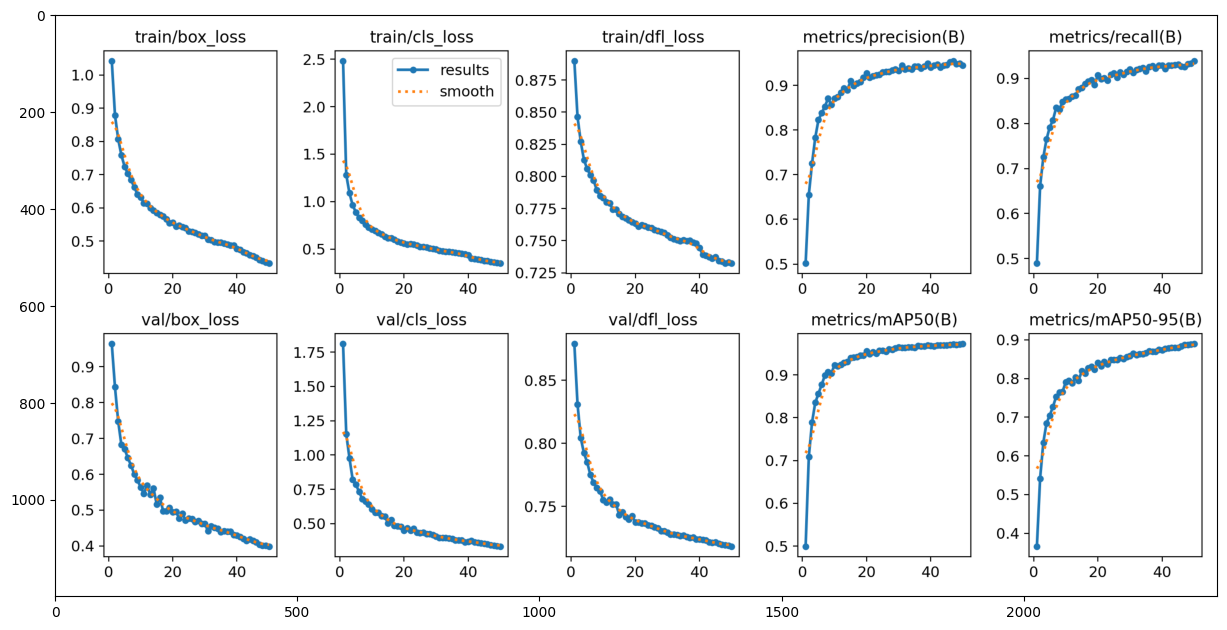

In [5]:
# Show results
fig = plt.figure(figsize=(15, 8))
plt.imshow(Image.open("/content/drive/MyDrive/YOLO_fine_tuning/runs/detect/final_train/results.png"))
plt.show()

# Plot the prediction on an example image

In [ ]:
# Load trained model
best_yolo_model = YOLO('runs/detect/final_train/weights/best.pt')


In [ ]:
def plot_original_and_predicted(image_path, yolo_model):

    # Load and plot the original image
    original_image = Image.open(image_path)

    # Run YOLO model on the image
    result = yolo_model(image_path)
    predicted_image_array = result[0].plot()  # BGR numpy array of predictions
    predicted_image = Image.fromarray(predicted_image_array[..., ::-1])  # RGB PIL image

    # Plot the images vertically
    plt.figure(figsize=(10, 5))
    plt.subplot(2, 1, 1)
    plt.imshow(original_image)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(2, 1, 2)
    plt.imshow(predicted_image)
    plt.title('Yolo predictions')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


image 1/1 /content/drive/MyDrive/YOLO_fine_tuning/data/yolo_format_data/test/images/d2bc1439-9cc3-48b7-8b86-8bd7515ada54.jpg: 128x640 1 \\frac, 2 \\pis, 6 \\right)s, 3 \\thetas, 1 +, 1 1, 1 2, 1 3, 4 4s, 1 6, 1 h, 1 r, 1 \\lim_, 1 \\cos, 1 \\sec, 217.1ms
Speed: 1.8ms preprocess, 217.1ms inference, 4.0ms postprocess per image at shape (1, 3, 128, 640)


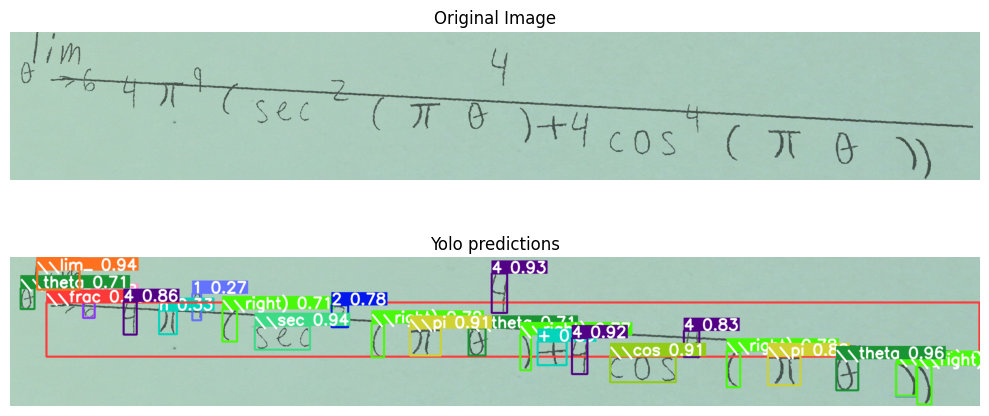

In [ ]:
# Plot an image and its box predictions
test_image_path = 'data/yolo_format_data/test/images/' + os.listdir('data/yolo_format_data/test/images')[2]
plot_original_and_predicted(test_image_path, best_yolo_model)